In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import Counter
from IPython.display import clear_output
import seaborn as sns
import numpy as np

## Importing
[to top](#Table-of-Contents) 

In [2]:
pwd

u'/Users/innovation-sfi/Dropbox/Research/Innovation/EPO/Data_processing/Python'

In [54]:
s = pk.load(open('pickles_and_munged_csv/pre1950_s_lnk_overlap_fracs_v1.pk', 'rb')); s

1900        AT  AU  BE  CA  CH        DE  DK  ES  FI  ...
1910              AT  AU  BE  CA        CH        DE  ...
1920              AT  AU        BE  CA        CH      ...
1930              AT  AU        BE        CA        CH...
1940              AT  AU        BE        CA        CH...
1950              AT        AU        BE        CA    ...
1960              AT        AU        BE        CA    ...
1970              AT        AU        BE        CA    ...
1980              AT        AU        BE        CA    ...
1990              AT        AU        BE        CA    ...
2000              AT        AU        BE        CA    ...
2010              AT        AU        BE        CA    ...
dtype: object

# Plotting

1900


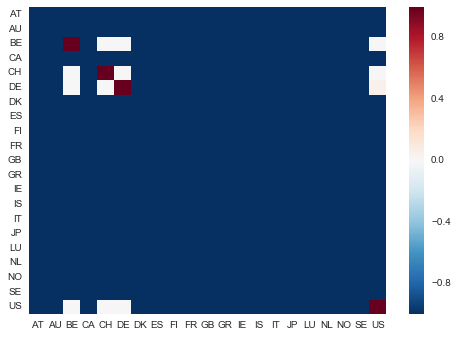

1910


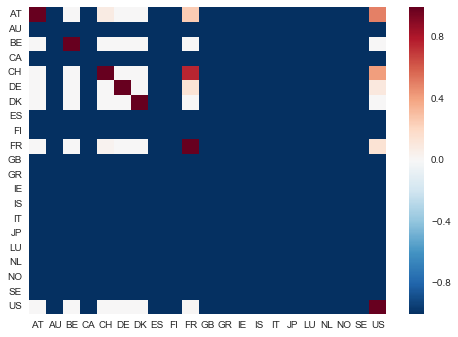

1920


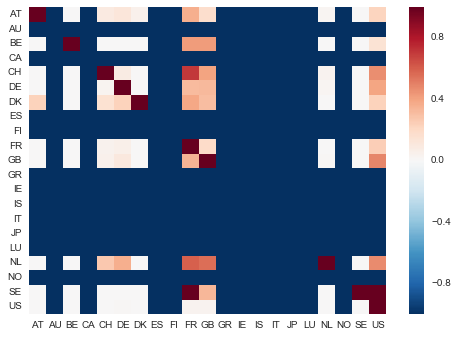

1930


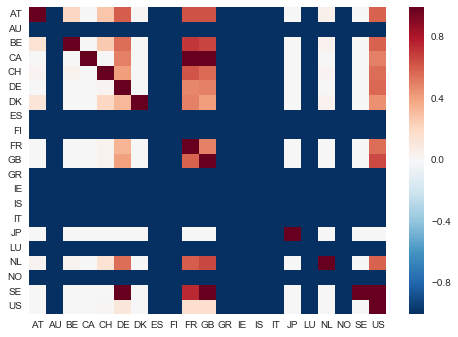

1940


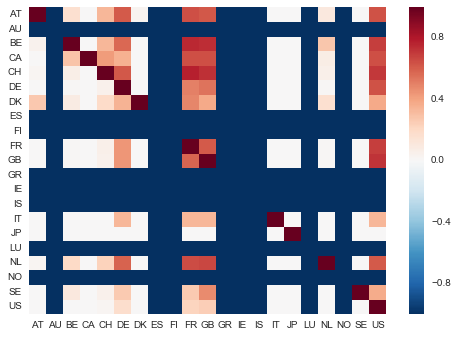

1950


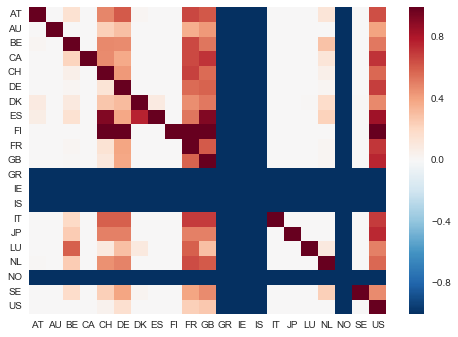

1960


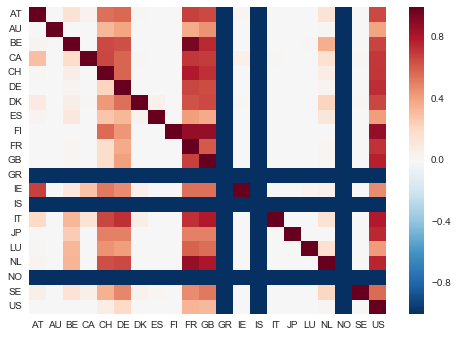

1970


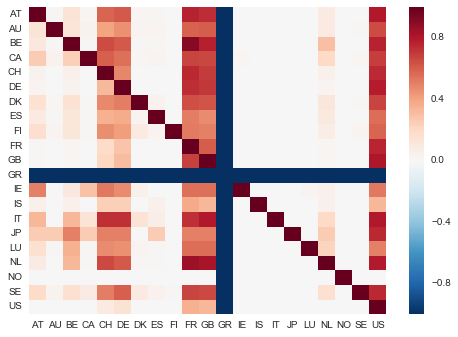

1980


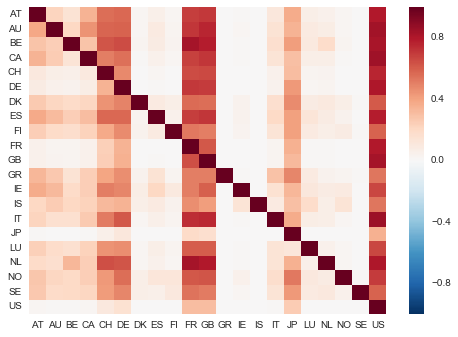

1990


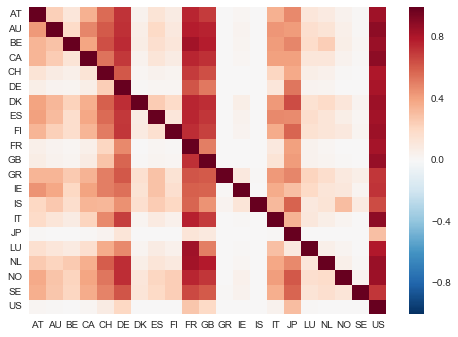

2000


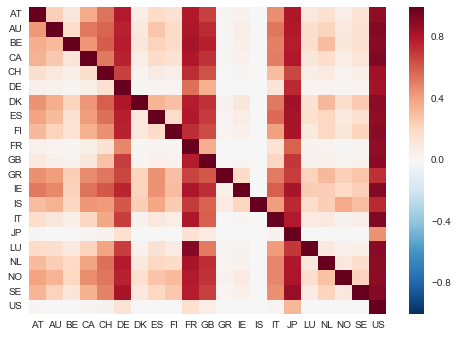

2010


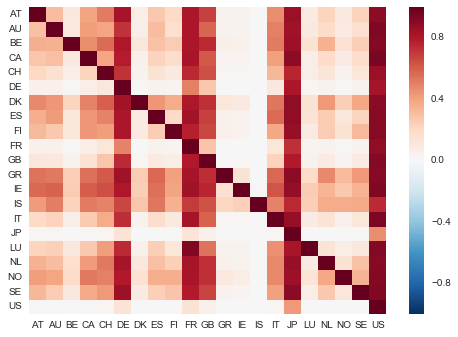

In [57]:
for inx in s.index:
    print inx
    sns.heatmap(s.loc[inx], vmin=-1, vmax=1)
    plt.show()

1900


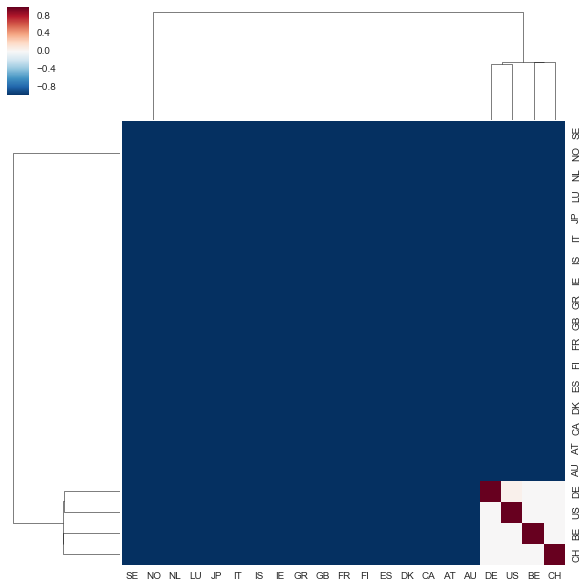

1910


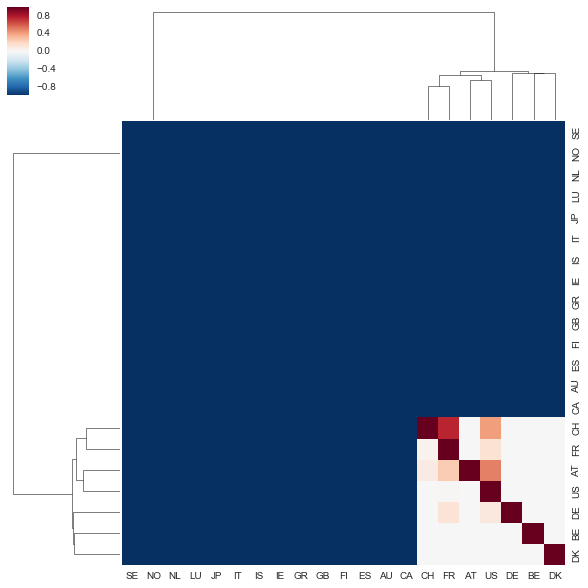

1920


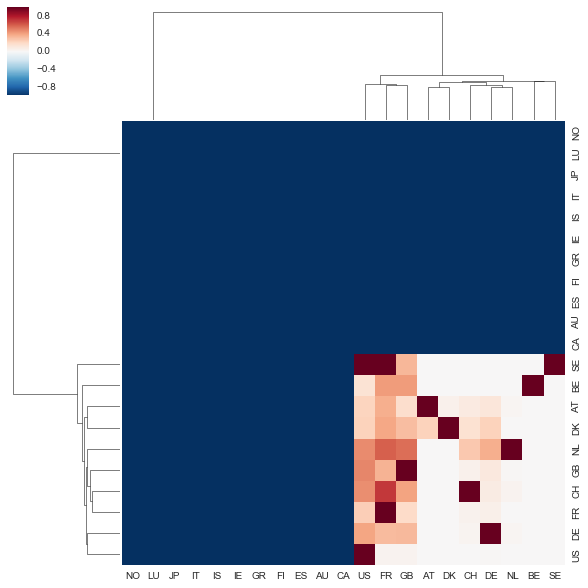

1930


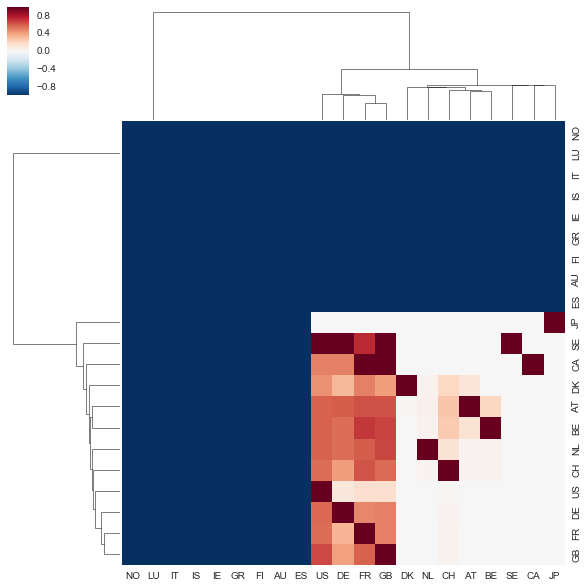

1940


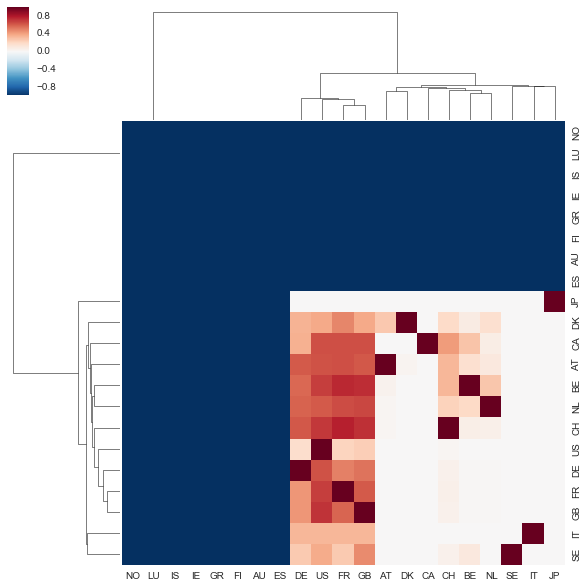

1950


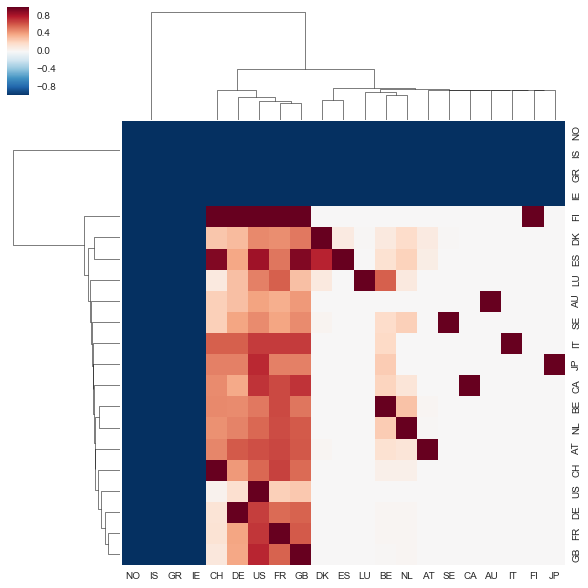

1960


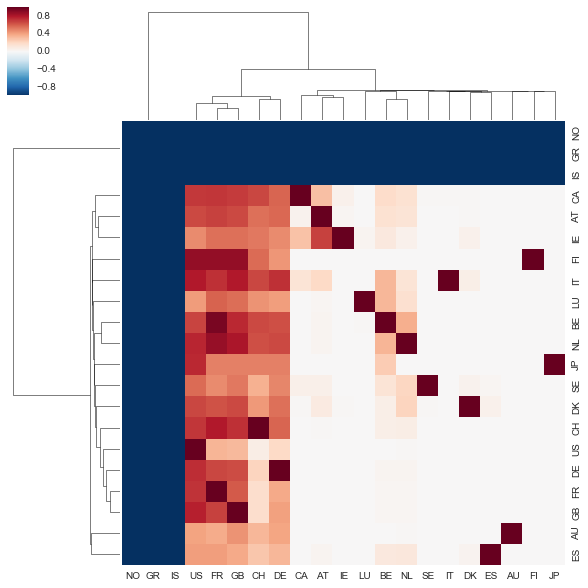

1970


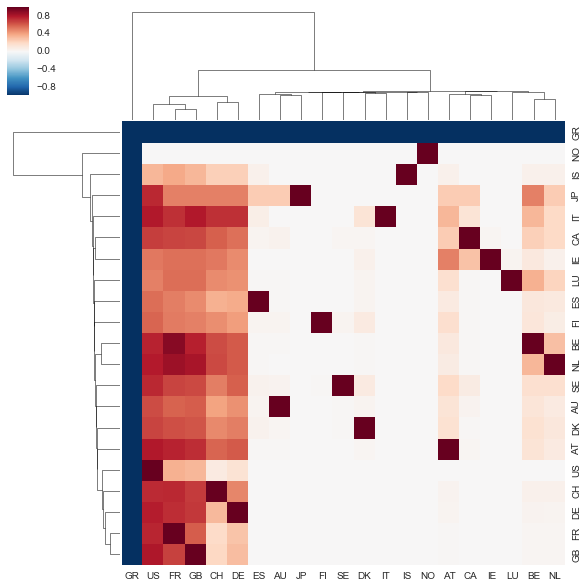

1980


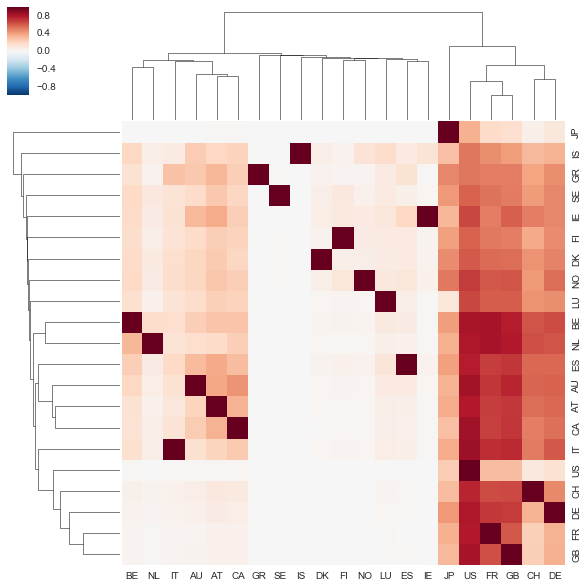

1990


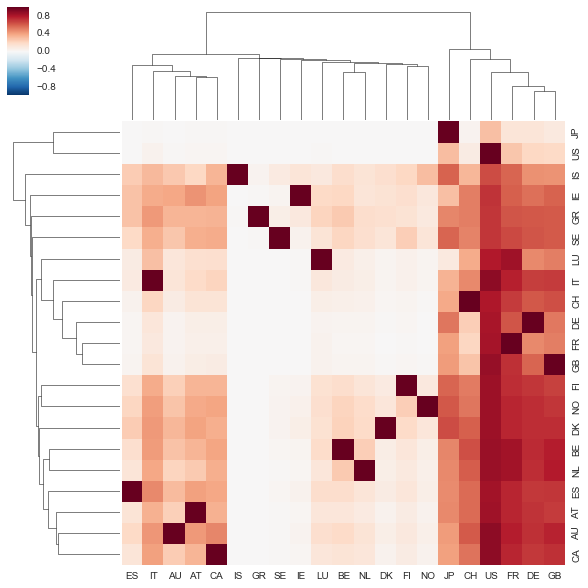

2000


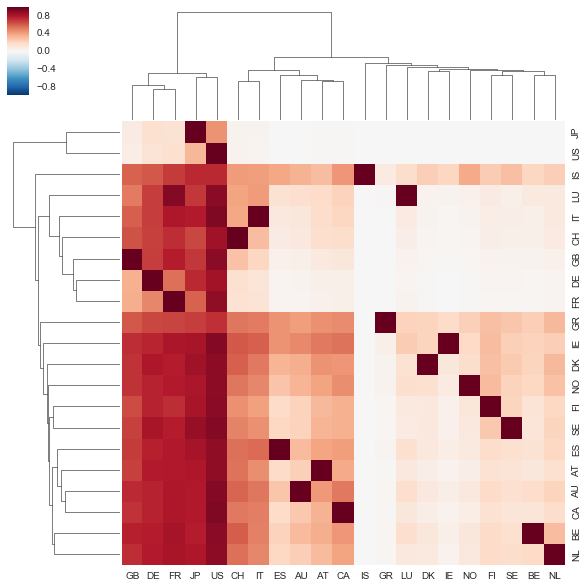

2010


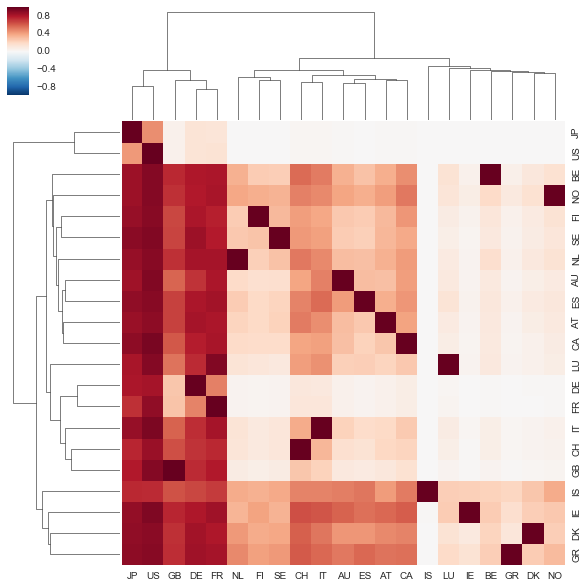

In [59]:
for inx in s.index:
    print inx
    sns.clustermap(s.loc[inx], vmin=-1, vmax=1)
    plt.show()

In [58]:
sizes = pk.load(open('pickles_and_munged_csv/', 'rb'))
sizes

appln_auth
US    5806200
CN    4825616
JP    3551215
DE    1998080
FR    1362220
SU    1310990
KR    1308899
GB    1004759
RU     516833
TW     448047
ES     352867
IT     217647
CH     190787
DD     132214
AT     116268
CS     107047
CA      98969
PL      93645
EP      68315
AU      53686
RO      47082
GR      46679
FI      41436
NL      40443
HU      39793
CZ      31990
SE      31705
BG      30754
ZA      25157
TR      25156
       ...   
SK       2830
GE       2160
LT       2082
EA       1926
SG       1878
HR       1795
EE       1360
OA       1268
MC       1222
MD       1099
JO       1022
IS        934
ZM        766
SM        554
CU        336
ZW        334
TJ        274
MN        222
MT        220
VN        119
HK        106
AP         94
MW         92
ID         88
GC         77
CL         26
BY         25
KE         19
NI         16
BA         11
dtype: int64

Clearly size is the main factor. The most interesting thing spotted so far is the difference in JP and US. Both are similarly sized, and much bigger than all the others. US contains most of the other nets except for JP. And JP, though very large, doesn't well contain the other nets. 
Points that JP is fundamentally different to the others. 
Interested to see KR and CN.

# Animation

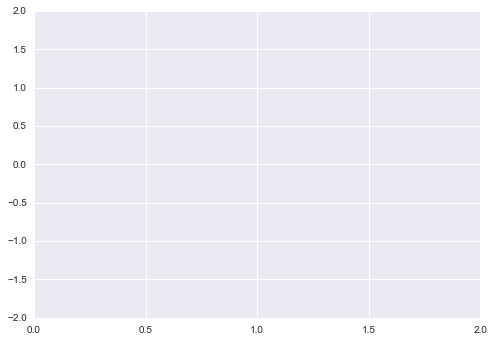

In [43]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
plt.show()

In [50]:
fig = plt.figure()

def init():
    #sns.heatmap(df.applymap(lambda x: 0))

def animate(i):
    plt.clf()
    sns.heatmap(df.applymap(lambda x: x+i))

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=100)

IndentationError: expected an indented block (<ipython-input-50-4a78e3b70543>, line 6)

//anaconda/lib/python2.7/site-packages/matplotlib/animation.py:782: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install mencoder or ffmpeg to save animations.

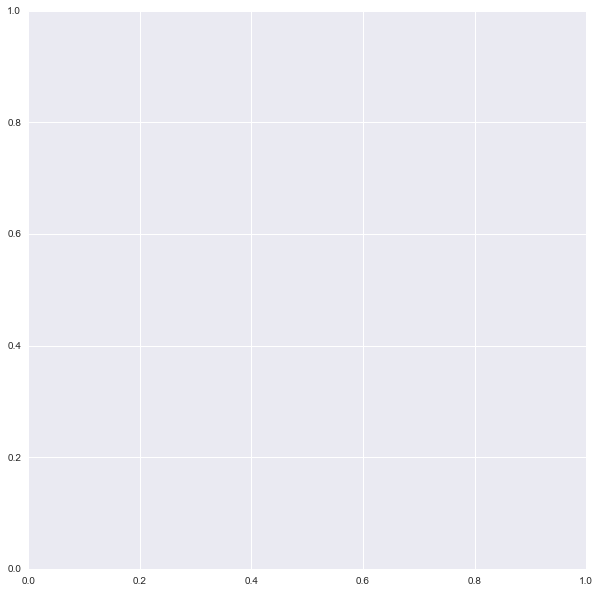

In [52]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.set()

def updatefig(i):
  plt.clf()
  data = df.applymap(lambda x: x+i)
  sns.heatmap(data)

anim = animation.FuncAnimation(fig, updatefig, frames=10,interval=100)
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

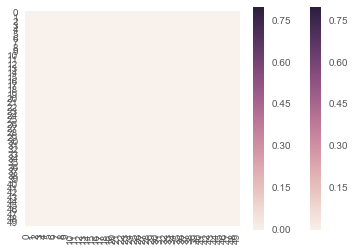

In [32]:
fig = plt.figure()

nx = 50
ny = 50

data = np.random.rand(nx, ny)
sns.heatmap(data, vmax=.8, square=True)



def init():
      sns.heatmap(np.zeros((nx, ny)), vmax=.8, square=True)

def animate(i):
    plt.clf()
    data = np.random.rand(nx, ny)
    sns.heatmap(data, vmax=.8, square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = False)